## SI 670 Applied Machine Learning, Week 5:  Trees, Bagging, Boosting, Calibration. (Due 10/12 11:59pm)

For this assignment, question 1 is worth 30 points, and question 2 (question 3) are worth 40 (30) points, for a total of 100 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file AND corresponding **HTML** file to the Canvas site.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Put your name here: Martin Zanaj

### Put your uniquename here: mzanaj

### Question 1 (30 points)

Please write the answers as well as your derivation process of the following questions. You can use either LaTeX or python code to represent your answer. For example, if you want to present <$x_1^2$>, in the LaTeX format you should write <(dollar sign) x_1^2 (dollar sign)>; in the python code format you should write <\`x_1\*\*2\`>. See [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/) for how to represent more mathmatical symbols in LaTeX format.

*Note: The whole question 1 does not require coding.*

#### (a) (10 points) One-hot encoding

If you have a dataset with three data points, and each data point has three features. Among them, X2 and X3 are categorical variables:

|    X1	|  X2 	|  X3	|
|----	|----	|----	|
|   1.3	|  a 	| a 	|
|   0.7 |  b 	| c 	|
|   2.1 |  a 	| b     |

Please mannually convert this dataset into numerical format with the categorical variables transformed into one-hot encoding. Please keep the order of X1, X2, and X3, and use the alphabetical order for the one-hot encoding.

> The basic idea of one-hot encoding is that for each categorical column- we determine the amount of unique categorical variables, and then ensure we add a column to the dataset for each unique variable, where we reppresent the appearing of one variable with a 1 (if it appears in the original column), or a 0 if it does not appear. We repeat this process for all categorical variables. 

>For example, X2 column is our first categorical column- we find that there are a total of 2 unique variables in this column (a,b). Hence we will replace the Column X2 in our original dataset with two new columns (X2A,X2B), where we encode with 1 or 0 what variable happened (a or b). 

|    X2	|                               X2A |  X2B	| 
|----	|                             ----	|----	|
|   a	|   ==>                         1   |  1    |
|   b   |   ==>                         0   |  1	|
|   a   |   ==>                         1	|  0    |

> The same goes for the Column X3 (since we have 3 unique variables,we will have 3 columns)

|    X3	|                               X3A |  X3B	| X3C 
|----	|                             ----	|----	|---
|   a	|   ==>                         1   |  0    | 0
|   c   |   ==>                         0   |  0	| 1
|   b   |   ==>                         0	|  1    | 0

> In the end we simply replace the original columns (categorical) with the updated encoded ones.

|    X1	|  X2A  |  X2B	| X3A | X3B|X3C
|----	|----	|----	|---- |--- |---
|   1.3	|   1	|  	0   |  1  |  0 | 0
|   0.7 |   0	|   1	|  0  |  0 | 1
|   2.1 |   1	|   0   |  0  |  1 | 0

#### (b) (10 points) Calibration
*Refer to image or code for work*

Recall the calibration curve has the predicted probability as its x-axis and the true probability as its y-axis. Now you are given a binary classifier and its predicted probability on a test set with 15 data points. The labels of these data points are also given. Please calculate the true probabilities in three bins: \[0, 0.3), \[0.3, 0.7), \[0.7, 1\]. You could further use these probabilities to draw a calibration curve but it's not required for this question. You only need to give the 3 numbers indicating the true probabilities.

|Predicted probability | Label |
|----	               |----   |
|   0.40               |   0   |
|   0.77               |   1   |
|   0.84               |   0   |
|   0.68               |   0   |
|   0.73               |   1   |
|   0.88               |   1   |
|   0.69               |   0   |
|   0.24               |   0   |
|   0.70               |   1   |
|   0.41               |   1   |
|   0.34               |   1   |
|   0.18               |   1   |
|   0.31               |   1   |
|   0.58               |   1   |
|   0.00               |   0   |


#### (c) (10 points) Random forests parameters

Suppose your current random forest classifier is facing an overfitting situation. Please state whether increase or decrease the following parameters can potentially help you reduce overfitting?

(i) `n_estimators`, This represents the number of trees in our forest. The higher the number of trees the better the performance of our model, but if we have performance constraints the code will run slower. Hence, **increase** n_estimators parameters given the fact that your processor can handle it. 

(ii) `max_features`, This represents the size of the random subsets of features to consider when splitting a node. Ideally, since only a subset of the features truly matters, we want to set max_features smaller than the numbers of predictors in the model. Also, given we are overfitting, we might want to **decrease** hte number of max_features. 

(iii) `max_depth`, Controls maximum depth (number of split points), and it is a common way to reduce tree complexity and overfitting. In our case, if we are overfitting (finding relationships when none exist), we want to prune the tree (i.e. be less specific). Hence, we would **decrease** the max_depth.

(iv) `n_jobs`, This parametere has nothing to do with the overfitting problem that we are trying to solve. Instead, it deals with the speed/processing times of our code throgub multi processing techniques. Now, given we have increased the n_estimators and our code will take more time to run, then, it makes sense to **increase** n_jobs so as to make our code run faster.

In [160]:
#Question #1(a) Check
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer 
import pandas as pd 
import numpy as np

# initialize list of lists 
data = [[1.3,'a','a'], [0.7,'b','c'], [2.1, 'a','b']] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['X1', 'X2', 'X3']) 

#One hot Encoder
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(df[['X2','X3']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()

#Re-create DataFrame
features = pd.DataFrame(feature_arr, columns= ['X2A', 'X2B', 'X3A' , 'X3B','X3C'])
features['X1'] = df['X1']
features=  features[['X1','X2A', 'X2B', 'X3A' , 'X3B','X3C']]
features

,X1,X2A,X2B,X3A,X3B,X3C
0,1.3,1.0,0.0,1.0,0.0,0.0
1,0.7,0.0,1.0,0.0,0.0,1.0
2,2.1,1.0,0.0,0.0,1.0,0.0


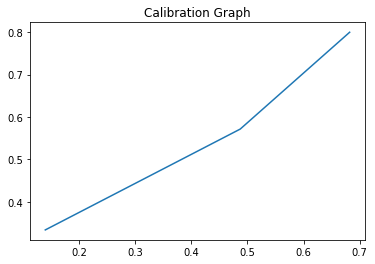

In [174]:
#Question 1(b) Check
import matplotlib.pyplot as plt
#1. Create Predicted probability & Label  data
data=[ [0.40,0]  ,[0.77,1] ,[0.84,0] ,[0.68,0] ,[0.73,1] ,[0.88,1] ,[0.69,0] ,[0.24,0] ,[0.70,1] ,[0.41,1] ,[0.34,1] ,[0.18,1] ,[0.31,1] ,[0.58,1] ,[0.00,0] ]
df = pd.DataFrame(data, columns = ['Predicted probability','Label']) 

#2. Sort by Predicted probability
df=df.sort_values(by = ['Predicted probability'])

#3. Divide the data set in bins= [0, 0.3),[0.3, 0.7), [0.7, 1]
bin1 = df[df['Predicted probability']<0.3]  
bin2 = df[(df['Predicted probability']>=0.3) & (df['Predicted probability']<0.7) ] 
bin3= df[(df['Predicted probability']>=0.7)] 

#4. Calculate fraction of actual positive in each bin 
bin1_mean= sum(bin1[bin1['Label']==1]['Label'])/len(bin1)
bin2_mean= sum(bin2[bin2['Label']==1]['Label'])/len(bin2)
bin3_mean= sum(bin3[bin3['Label']==1]['Label'])/len(bin3)

#The average of probabilities predicted by the model.
model_average1= sum(bin1['Predicted probability'])/len(bin1)
model_average2= sum(bin2['Predicted probability'])/len(bin2)
model_average3= sum(bin2['Predicted probability'])/len(bin3)

#5. Plot a graph with fraction of positive on y-axis and average probability on x-axis.
y =[bin1_mean,bin2_mean,bin3_mean]
x= [model_average1,model_average2,model_average3]

#Calibration curve 
plt.plot(x,y)
plt.title('Calibration Graph')
plt.show()

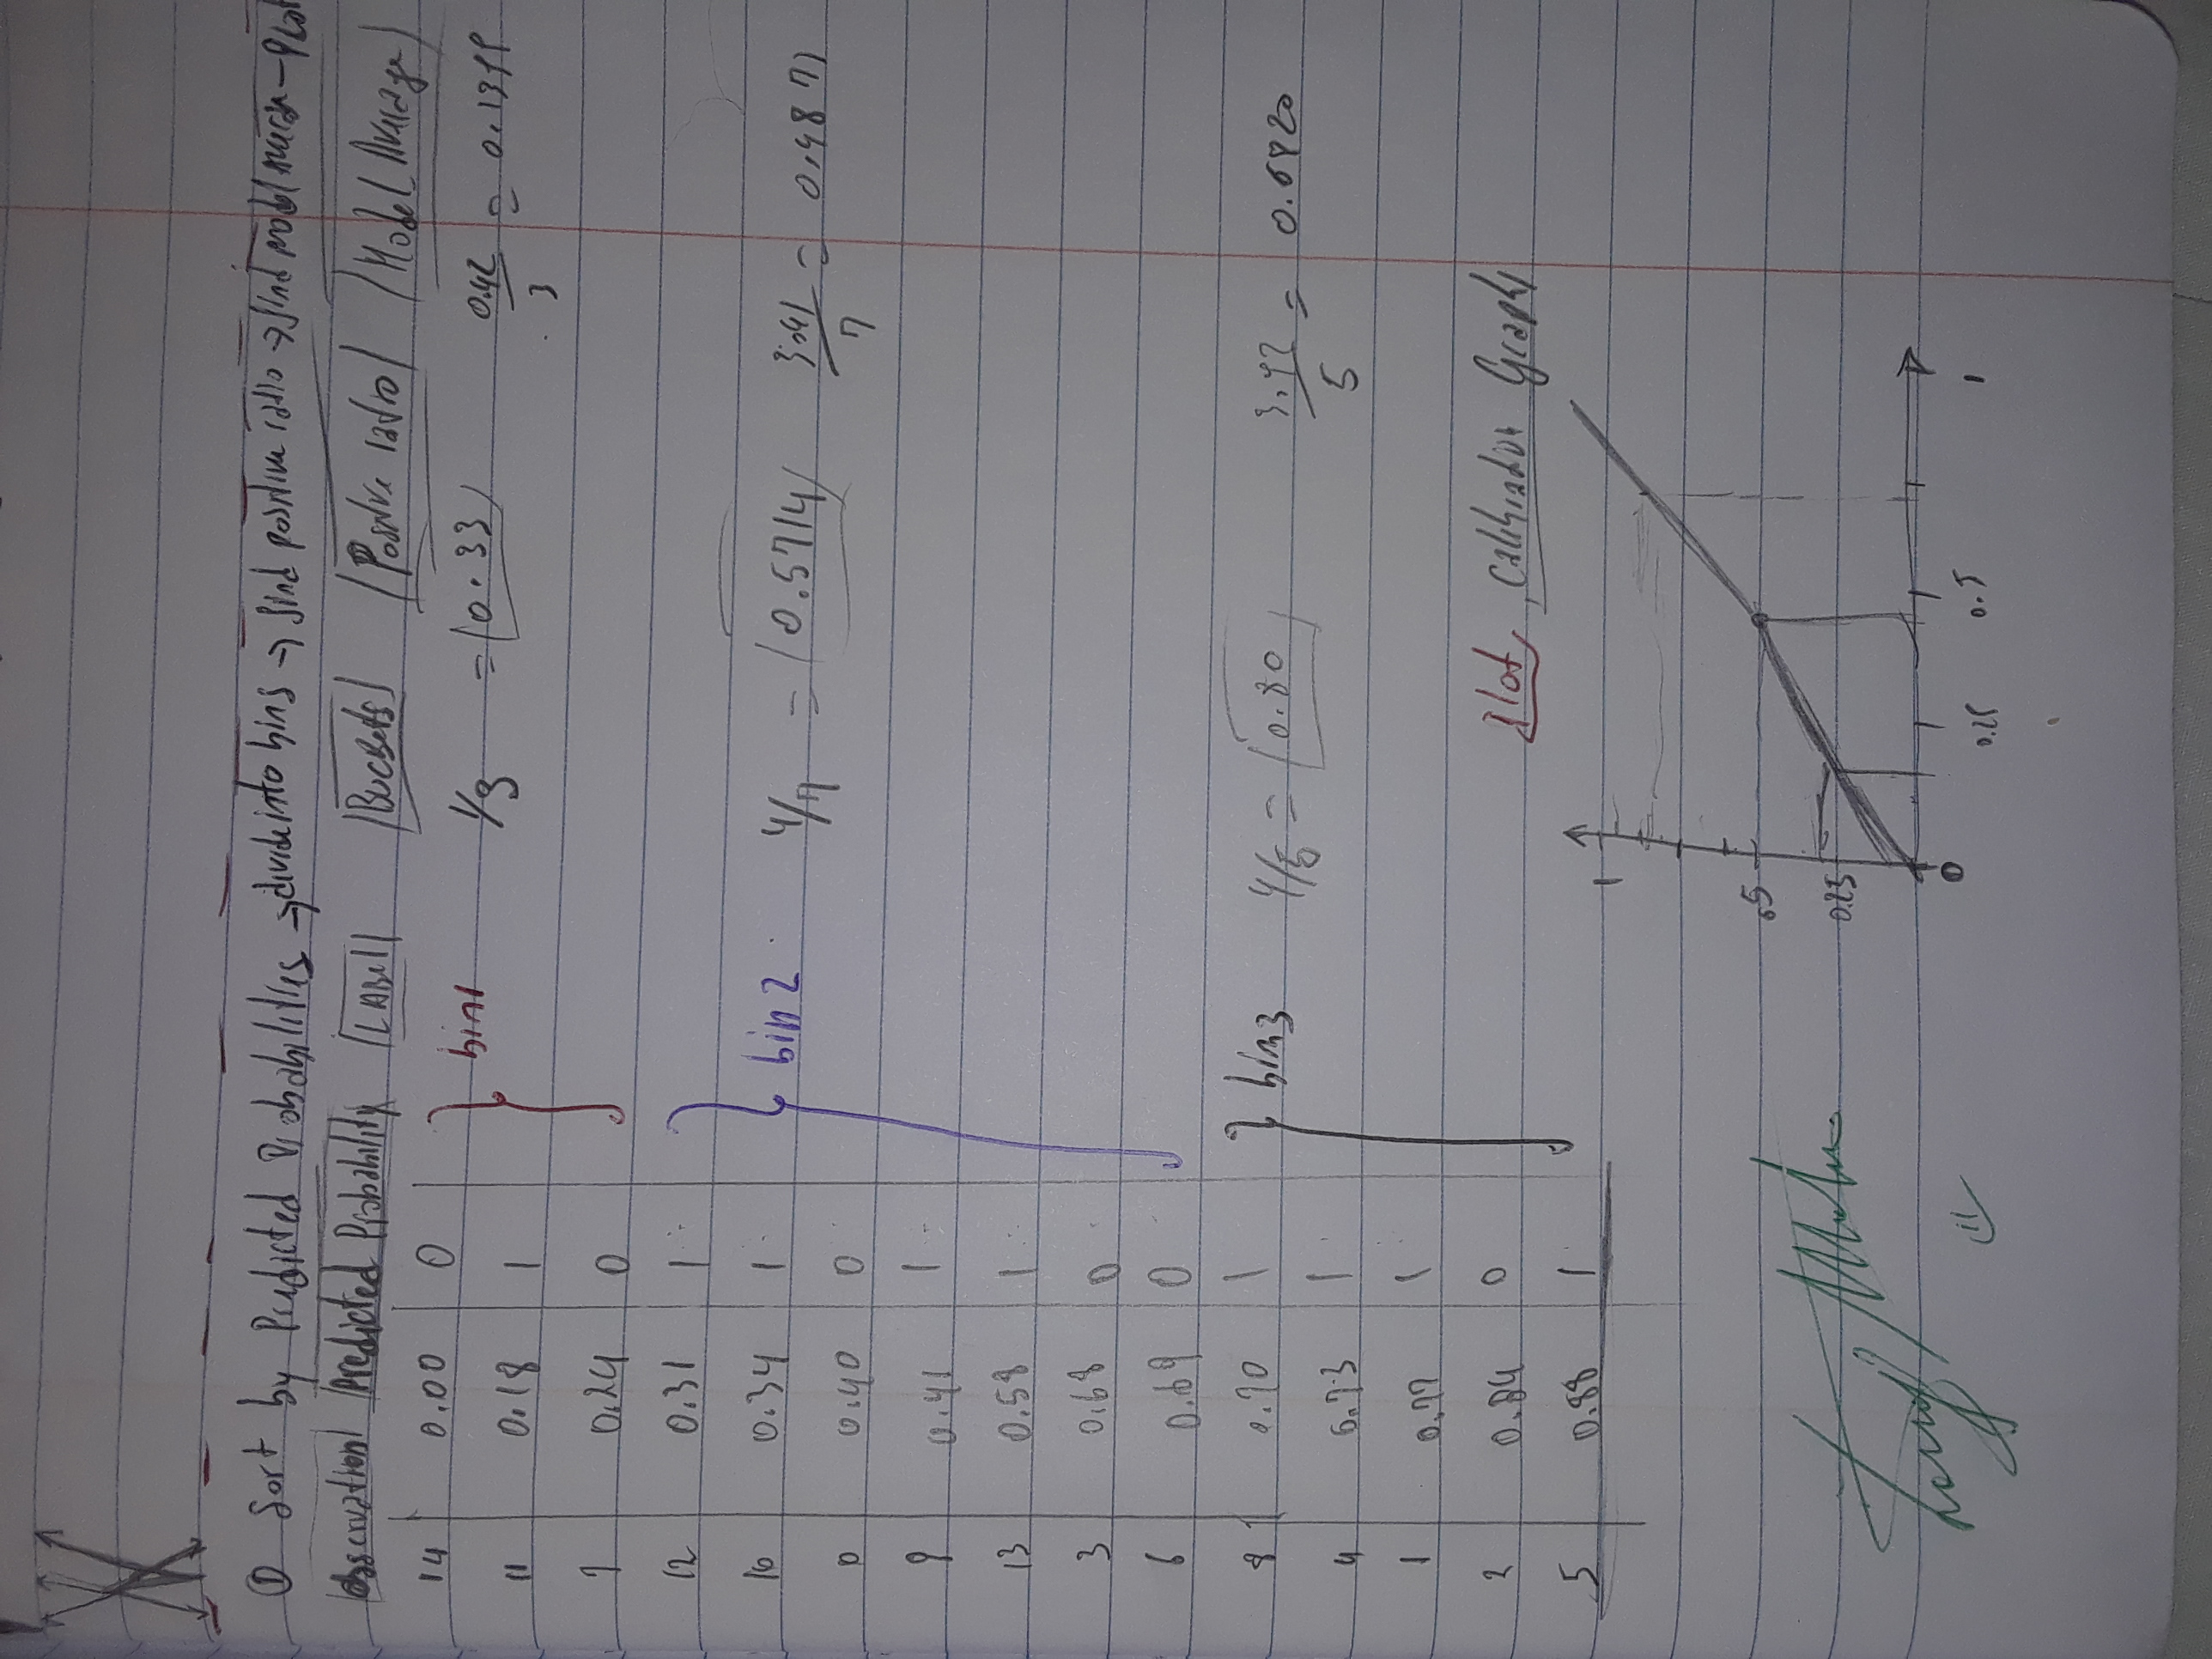

### Question 2 (40 points) Cross-validation for very small datasets.

In our lecture about data leakage, we have talked about a simple strategy to help you avoid data leakage: hold out a test set before you do anything. However, this strategy is not applicable when you have a very small dataset. For example, if you got a dataset with total number of samples as 60, if you use the default train_test_split, you will get a test set with 15 samples. In this case, the evaluation score based on merely 15 samples could be very unreliable and we cannot trust it.

To make the evaluation more reliable, people usually use cross-validation to do the evaluation. That is, split the train and test set multiple times and calculate the average of test scores. Here, however, we need to pay additional attention to potential data leakage. One important thing is to make sure all the hyper-parameter search is done within each fold. 

The general recipe is as follows,
* Split the whole dataset into k folds
* For i from 1 to k
    - Take the i-th fold as the test set and other folds as the training set
    - Both tune the hyper-parameters and learn the model on the training set
    - Calculate the test score on the test set(the defalut score method in Ridge regression)
* Report the average of the test scores

#### Question 2a (20 points) Non-nested cross validation (i.e., without cross validation in the inner loop)

In this question, please do 4-fold cross-validation on the subset of boston dataset by using `KFold` with `random_state = 5`. For non-nested cross validation, you only apply `Kfold` on the entire dataset, but not the training set within each fold.

You can use default `train_test_split` (with `random_state = 5`) to get train and validation data. Train a Ridge regression model and tune the hyper-parameter alpha within each fold. Please note that the data should be properly normalized by `StandardScaler` within each fold. (*Hint: There are two separate normalizations in each fold: first normalize the train/validation set of the training data and after you get the best hyperparameter, normalize the training/testing set (where the training set now is the combination of train/validation set in the first procedure).*)

We have selected first 60 samples from the dataset and given 'alpha_list' for you to tune. Finally, you need to 

- return the mean value for test scores in all folds.
- return the list of the alpha that achieve the best performance in each fold
- return the list of the test-set `score` (with the best-performing alpha) of each fold



In [46]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
# without cross validation in the inner loop
def answer_two_a():
    from sklearn.datasets import load_boston
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.preprocessing import StandardScaler

    alpha_list = [0.001, 0.01,0.1,1,10]
    X,y = load_boston(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    
    kf = KFold(n_splits=4, random_state=5)  
    test_list = []
    best_alpha_list= []
    
    #Folds
    for train_index, test_index in kf.split(X):
        #Train/Test FOLD K
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Train/Validation  data
        X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train,y_train, random_state = 5)
        
        #First normalization (fit train, transform test)
        scaler = StandardScaler()
        standardized_X_train_new= scaler.fit_transform(X_train_new)
        standardized_X_test_new = scaler.transform(X_test_new)
        
        r2_test_ridge = []
        #Hyper-parameterization  (on testing)
        for alpha in alpha_list:
            linridge = Ridge(alpha = alpha)
            linridge.fit(standardized_X_train_new, y_train_new)
            r2_test_ridge.append(linridge.score(standardized_X_test_new, y_test_new))
        
        #Best score from hyperparameterization & index of best alpha
        best_ridgereg_r_2_test = max(r2_test_ridge)
        index= r2_test_ridge.index(max(r2_test_ridge))

        #Second normalization
        scaler = StandardScaler()
        standardized_X_train= scaler.fit_transform(X_train)
        standardized_X_test = scaler.transform(X_test)
        
        #Fit Ridge to test data
        linridge = Ridge(alpha = alpha_list[index])
        linridge.fit(standardized_X_train, y_train)
        
        #Test score & Best alpha
        test_list.append(linridge.score(standardized_X_test, y_test))
        best_alpha_list.append(alpha_list[index])
    
    return np.mean(test_list), best_alpha_list, test_list
    
answer_two_a()    

(0.42907221164781423,
 [1, 1, 1, 10],
 [0.2700119979815859,
  0.13885868603845597,
  0.91792120521119,
  0.3894969573600251])

#### Question 2b (20 points) Nested cross validation (i.e., with cross validation in the inner loop)

In this question, you will conduct nested cross validation. For the outer loop, please do 4-fold cross-validation on the subset of boston dataset by using `KFold` with `random_state = 5`. For the inner loop, please do 2-fold cross validation (*Hint: you can do this by using another `KFold` with `random_state = 5` and report the test-set performance of this fold with the alpha that generates the highest mean score of the two folds*). Train a Ridge regression model and tune the hyper-parameter alpha within each fold. Similarly, you will normalize the data properly. (*Hint: normalize the data separately for each fold of the inner-loop of the cross validation and the outer-loop of the cross validation.*)

We have selected first 60 samples from the dataset and given 'alpha_list' for you to tune. Finally, you need to 

- return the mean value for test scores in all folds.
- return the list of the alpha that achieve the best performance in each fold
- return the list of the test-set `score` (with the best-performing alpha) of each fold


(Additional note -- This is not a question to answer, but what we want you to learn from Question 2: By comparing the results of 2a and 2b, you will find which approach produces better performance in this scenario and why. (No need to explain))

In [140]:
# with cross validation in the inner loop
def answer_two_b():
    from sklearn.datasets import load_boston
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler
    import numpy as np

    X,y = load_boston(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    
    alpha_list = [0.001, 0.01,0.1,1,10]
    kf = KFold(n_splits=4, random_state=5)
    
    test_list = []
    best_alpha_list= []
    
    #Fold 1
    for train_index, test_index in kf.split(X):
        #Train/Test 
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Fold 2
        kf2 = KFold(n_splits=2, random_state=5) 
        test_scores = []
        for train_index2, test_index2 in kf2.split(X_train):
            #Train/Test 
            X_train2, X_test2 = X_train[train_index2], X_train[test_index2]
            y_train2, y_test2 = y_train[train_index2], y_train[test_index2]
            
            #First normalization (fit train, transform test)
            scaler = StandardScaler()
            standardized_X_train_new= scaler.fit_transform(X_train2)
            standardized_X_test_new = scaler.transform(X_test2)
            
            r2_test_ridge = []
            
            #Hyper-parameterization  (on testing)
            for alpha in alpha_list:
                linridge = Ridge(alpha = alpha)
                linridge.fit(standardized_X_train_new, y_train2)
                r2_test_ridge.append(linridge.score(standardized_X_test_new, y_test2))
            
            test_scores.append(r2_test_ridge)
        
        #Best score from hyperparameterization & best alphas (highest mean )    
        first= test_scores[0]
        second =test_scores[1]
        max_mean = []
       
        for x in range(len(alpha_list)):
            mean=(first[x]+second[x])/2
            max_mean.append(mean)
            
        #Index of  best alpha
        index = max_mean.index((max(max_mean)))
                
        #Second normalization
        scaler = StandardScaler()
        standardized_X_train= scaler.fit_transform(X_train)
        standardized_X_test = scaler.transform(X_test)
        
        #Fit Ridge to test data
        linridge = Ridge(alpha = alpha_list[index])
        linridge.fit(standardized_X_train, y_train)
        
        #Test score & Best alpha
        test_list.append(linridge.score(standardized_X_test, y_test))
        best_alpha_list.append(alpha_list[index])
                                          
    return np.mean(test_list), best_alpha_list,test_list

answer_two_b()    

(0.537393905509219,
 [10, 10, 1, 10],
 [0.43098072808469323,
  0.4111767313809672,
  0.91792120521119,
  0.3894969573600251])

### Question 3 (30 points)

Download the dataset from the Canvas folder or from [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) (Use the german.data). The last column is the prediction target and the remaining columns are features.


#### Question 3a One-hot encoding (10 points)
First transform the categorical features into one-hot encoding. Please generate a dataset with `X_data_transformed` and `y` with numerical feature columns in `german.data` unchanged and categorical feature columns in `german.data` one-hot encoded. Please also convert `y` to 0-1 binary variable by `y = y - 1`. 

Then, use random_state = 0 to train_test_split the one-hot encoded dataset.

This function should return `X_train, X_test, y_train, y_test`.

*Hint1: The columns of categorical features are 0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19.*

*Hint2: You may have problem using `OneHotEncoder` to handle string values and numerical values at the same time. You can transform the string columns frist and then concatenate with the numberical features.*

In [156]:
def answer_three_a():
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split
    filename = 'german.data'
    
    #Process data
    data = pd.read_csv(filename, header=None, sep=' ')
    
    #One hot Encoder to categorical columns
    ohe = OneHotEncoder(categories='auto')
    feature_arr = ohe.fit_transform(data[[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]]).toarray()
   
    #Labels 
    feature_labels= ohe.get_feature_names()

    #Re-create DataFrame
    features = pd.DataFrame(feature_arr, columns=feature_labels)
    numerical_data = data[[1,4,7,10,12,15,17,20]]
    numerical_data[20] = numerical_data[20]-1
    encoded_data = pd.concat([numerical_data.reset_index(drop=True),features.reset_index(drop=True)], axis=1)
    
    #Get X & y (predictor space & response)
    X=encoded_data.drop([20],axis=1)
    y= encoded_data[20]
    
    #Split data into training & testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return X_train, X_test, y_train, y_test
answer_three_a()

(      1      4  7  10  12  15  17  x0_A11  x0_A12  x0_A13    ...     x9_A152  \
 253  24   4151  2   3  35   2   1     0.0     0.0     0.0    ...         1.0   
 667  48   3609  1   1  27   1   1     0.0     0.0     0.0    ...         1.0   
 85   12   1412  4   2  29   2   1     0.0     0.0     0.0    ...         1.0   
 969  11   3939  1   2  40   2   2     1.0     0.0     0.0    ...         1.0   
 75   12   1526  4   4  66   2   1     1.0     0.0     0.0    ...         0.0   
 786  22   2675  3   4  40   1   1     0.0     0.0     0.0    ...         1.0   
 658  30   4221  2   1  28   2   1     0.0     1.0     0.0    ...         1.0   
 465  24   2924  3   4  63   1   2     1.0     0.0     0.0    ...         1.0   
 920  18   1817  4   2  28   2   1     0.0     0.0     0.0    ...         1.0   
 38   10   1225  2   2  37   1   1     0.0     0.0     1.0    ...         1.0   
 944  15   1845  4   1  46   1   1     1.0     0.0     0.0    ...         0.0   
 725   6    250  2   2  41  

#### Question 3b Random Forest (10 points)
 
In this question, you will train a random forest classifier (with random_state = 0). You should return the train accuracy, test accuracy, and feature importance. 

In [157]:
def answer_three_b():
    
    from sklearn.ensemble import RandomForestClassifier
    #Data
    X_train, X_test, y_train, y_test = answer_three_a()
    
    #Fit model
    clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    
    #Metrics
    train_score= clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    feature_importances= clf.feature_importances_
    
    return train_score, test_score, feature_importances

answer_three_b()

(1.0, 0.76, array([0.0802986 , 0.0976686 , 0.03091733, 0.03257086, 0.07567544,
        0.01703202, 0.01304265, 0.04268108, 0.01834482, 0.00843781,
        0.04247626, 0.01702448, 0.01418799, 0.01375926, 0.0098474 ,
        0.02080779, 0.01659273, 0.01141157, 0.00242818, 0.01428608,
        0.01294845, 0.00366727, 0.00463593, 0.00864259, 0.0017358 ,
        0.00994028, 0.01635532, 0.00873932, 0.00737343, 0.00521555,
        0.01388596, 0.00582617, 0.02028221, 0.01250254, 0.01066609,
        0.01301823, 0.00677523, 0.01327216, 0.01290959, 0.00798521,
        0.00978768, 0.00645325, 0.00766059, 0.0174409 , 0.01322905,
        0.01558148, 0.01236559, 0.01360097, 0.00569658, 0.01463486,
        0.01237166, 0.01543953, 0.00747297, 0.00229443, 0.00947352,
        0.01676497, 0.01091589, 0.01368388, 0.01291646, 0.00323865,
        0.00310883]))

#### Question 3c Decision Tree (10 points)
 
In this question, you will train a decision tree classifier (with random_state = 0). You should return the train accuracy, test accuracy, and feature importance. 

In [158]:
def answer_three_c():
    
    from sklearn.tree import DecisionTreeClassifier
    #Data
    X_train, X_test, y_train, y_test = answer_three_a()
    
    #Fit model
    clf = DecisionTreeClassifier().fit(X_train, y_train)

    train_score= clf.score(X_train, y_train)
    test_score= clf.score(X_test, y_test)
    feature_importances=clf.feature_importances_

    return train_score, test_score, feature_importances
answer_three_c()

(1.0, 0.676, array([0.09831272, 0.12890235, 0.01910355, 0.0392159 , 0.08577309,
        0.02318853, 0.02075946, 0.02265751, 0.        , 0.        ,
        0.09234069, 0.01324175, 0.01197633, 0.0101943 , 0.00316659,
        0.02786375, 0.01799153, 0.        , 0.        , 0.01714126,
        0.01732827, 0.        , 0.        , 0.00859164, 0.00431008,
        0.00131941, 0.00124498, 0.        , 0.01172403, 0.00945224,
        0.02548144, 0.00563851, 0.0287104 , 0.01377269, 0.00814265,
        0.01609817, 0.01000932, 0.        , 0.00844423, 0.00501086,
        0.0229343 , 0.01222312, 0.01455803, 0.0134596 , 0.01078148,
        0.03308106, 0.00791647, 0.01911421, 0.01299668, 0.01619118,
        0.        , 0.        , 0.01063069, 0.0022518 , 0.00562949,
        0.        , 0.        , 0.        , 0.        , 0.00584601,
        0.00527765]))